In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import re
%run functions.py
import pickle

import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA

from sklearn.mixture import GMM
from sklearn import mixture
from sklearn.mixture import GaussianMixture

from nltk import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer

from gensim.matutils import Sparse2Corpus
from gensim import models

%matplotlib inline

import matplotlib.gridspec as gridspec

from subprocess import check_output

from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [ ]:

df=unpickle_('df_clean.pickle')
count_vectorizer=unpickle_('count_vectorizer.pickle')
count_sparse=unpickle_('count_sparse.pickle')
tfidf_vectorizer=unpickle_('tfidf_vectorizer.pickle')
tfidf_sparse=unpickle_('tfidf_sparse.pickle')


## PCA

In [447]:
#Principle Component Analysis for dimensionality reduction
pca = PCA(n_components=.96)

In [448]:
pca.fit(tfidf_sparse.toarray())

PCA(copy=True, iterated_power='auto', n_components=0.96, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [449]:
sum(pca.explained_variance_ratio_)

0.9600007454940405

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='x-pca', y='y-pca', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [202]:
'''
n_sne = 7000


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') )
''';

In [312]:
print(tfidf_sparse)

  (0, 1557)	0.13782943000496833
  (0, 1196)	0.10962739042666499
  (0, 110)	0.10119385418553636
  (0, 407)	0.233492289538628
  (0, 84)	0.03462495191634273
  (0, 1862)	0.016708126013314693
  (0, 529)	0.013247247323614982
  (0, 1055)	0.04800980916707125
  (0, 1360)	0.04258332241328631
  (0, 1798)	0.009563406471381134
  (0, 1504)	0.41453477992460913
  (0, 71)	0.05393567185085479
  (0, 854)	0.012581070342655048
  (0, 1208)	0.014137919983252898
  (0, 743)	0.02524273368139476
  (0, 479)	0.017869964332112246
  (0, 53)	0.04255061480722756
  (0, 107)	0.011142808395242225
  (0, 750)	0.05271749456198658
  (0, 1348)	0.023823144167475278
  (0, 1135)	0.02187197554508913
  (0, 1700)	0.049267648269092294
  (0, 1132)	0.05072720843447307
  (0, 1131)	0.051761703981190066
  (0, 747)	0.03366664663874454
  :	:
  (7237, 906)	0.023620907808459237
  (7237, 408)	0.04527308902752304
  (7237, 1104)	0.09579900498562618
  (7237, 0)	0.00902106229457562
  (7237, 675)	0.10649400164835074
  (7237, 220)	0.009157688923998

In [362]:
def model_pca(dense_matrix):
    pca = PCA(n_components=.9)
    pca_topicspace = pca.fit_transform(tfidf_sparse.toarray())
    return pca, pca_topicspace

In [363]:
pca_model, pca_matrix = model_pca(tfidf_sparse)

In [376]:
pca_model.components_.shape

(855, 2000)

In [365]:
pca_matrix

array([[ 0.0322511 , -0.07706175, -0.07590297, ..., -0.02676903,
         0.03803518, -0.00218032],
       [ 0.03305002,  0.03800134,  0.03865249, ...,  0.00285375,
         0.03398935, -0.01994318],
       [ 0.18082965, -0.04100544, -0.03825589, ...,  0.00942269,
         0.00365471,  0.01936467],
       ...,
       [ 0.00148417, -0.11356356,  0.0209728 , ..., -0.01522743,
        -0.01490143, -0.03399587],
       [-0.10716384,  0.01936127, -0.02395996, ...,  0.01012499,
         0.00147209,  0.01880711],
       [-0.13634792,  0.0362303 ,  0.04724223, ...,  0.01351218,
         0.01749372,  0.01013241]])

In [366]:
pca_model.components_

array([[-0.00222743, -0.00339337,  0.00737604, ..., -0.0044125 ,
        -0.00878033, -0.01130356],
       [ 0.00477592, -0.00110159, -0.00362388, ..., -0.00202566,
        -0.00779738,  0.01633854],
       [-0.00631708,  0.00042428, -0.00707599, ...,  0.00566679,
         0.00535121,  0.00118661],
       ...,
       [-0.01151755,  0.04131916, -0.00531643, ..., -0.07405408,
         0.00841508, -0.00333308],
       [ 0.00208927,  0.01209063, -0.00470985, ..., -0.02267401,
         0.00967217,  0.00968461],
       [ 0.00022796, -0.03155497, -0.01022113, ..., -0.04120567,
        -0.01904955, -0.00249591]])

In [367]:
pickle_(pca_model, 'pca_model')
pickle_(pca_matrix, 'pca_matrix')

'''
lda_model=unpickle_('lda_model.pickle')
lda_matrix=unpickle_('lda_matrix.pickle')
'''

"\nlda_model=unpickle_('lda_model.pickle')\nlda_matrix=unpickle_('lda_matrix.pickle')\n"

In [368]:
topic_model(tfidf_vectorizer, pca_model, num_words=10)

Topic 1
['neuron', 'network', 'spike', 'cell', 'layer', 'input', 'imag', 'unit', 'activ', 'neural']
Topic 2
['polici', 'action', 'reward', 'state', 'agent', 'regret', 'mdp', 'neuron', 'reinforc', 'spike']
Topic 3
['neuron', 'spike', 'f', 'synapt', 'cell', 'synaps', 'stimulu', 'matrix', 'u', 'w']
Topic 4
['network', 'train', 'layer', 'learn', 'unit', 'w', 'weight', 'input', 'f', 'neural']
Topic 5
['cluster', 'node', 'graph', 'network', 'tree', 'edg', 'algorithm', 'v', 'partit', 'unit']
Topic 6
['posterior', 'distribut', 'gaussian', 'sampl', 'infer', 'estim', 'q', 'data', 'z', 'bayesian']
Topic 7
['kernel', 'cluster', 'polici', 'svm', 'learn', 'data', 'graph', 'featur', 'spike', 'neuron']
Topic 8
['label', 'classifi', 'tree', 'y', 'spike', 'regret', 'class', 'topic', 'loss', 'classif']
Topic 9
['graph', 'node', 'v', 'tree', 'y', 'kernel', 'imag', 'edg', 'z', 'u']
Topic 10
['cluster', 'neuron', 'spike', 'polici', 'y', 'imag', 'learn', 'w', 'z', 'label']
Topic 11
['rank', 'topic', 'word', 

Topic 348
['cut', 'smooth', 'vote', 'nonlinear', 'ut', 'converg', 'fi', 'round', 'calibr', 'admm']
Topic 349
['surfac', 'schedul', 'gmm', 'xa', 'capac', 'xj', 'episod', 'mt', 'convolut', 'fi']
Topic 350
['ft', 'screen', 'max', 'exemplar', 'prototyp', 'xa', 'st', 'equat', 'structur', 'hidden']
Topic 351
['posterior', 'ft', 'admm', 'rf', 'walk', 'cascad', 'represent', 'dataset', 'rl', 'level']
Topic 352
['ep', 'stream', 'patient', 'smooth', 'diffus', 'prior', 'hypothesi', 'perceptron', 'iter', 'cone']
Topic 353
['rout', 'sv', 'penalti', 'diffus', 'vi', 'transfer', 'veloc', 'posterior', 'player', 'rt']
Topic 354
['prototyp', 'oracl', 'frequenc', 'mode', 'schedul', 'environ', 'wavelet', 'entropi', 'vi', 'posterior']
Topic 355
['ft', 'pac', 'tk', 'site', 'ucb', 'diffus', 'vt', 'quantiz', 'rt', 'ai']
Topic 356
['cliqu', 'puls', 'select', 'bit', 'adversari', 'option', 'track', 'admm', 'actor', 'commun']
Topic 357
['select', 'skill', 'cnn', 'view', 'descriptor', 'proxim', 'dictionari', 'nn', '

Topic 659
['pm', 'cifar', 'softmax', 'harmon', 'ji', 'count', 'gk', 'student', 'coher', 'kx']
Topic 660
['payoff', 'tp', 'shift', 'qk', 'surrog', 'nonneg', 'lr', 'student', 'mp', 'approach']
Topic 661
['pyramid', 'db', 'conv', 'design', 'yn', 'binari', 'cover', 'vk', 'cv', 'ei']
Topic 662
['stimuli', 'hm', 'extract', 'sigmoid', 'neighborhood', 'mcmc', 'bn', 'qk', 'saddl', 'mn']
Topic 663
['sign', 'np', 'size', 'da', 'kx', 'coher', 'laplacian', 'fs', 'tn', 'epoch']
Topic 664
['size', 'mcmc', 'acoust', 'waveform', 'approach', 'shrinkag', 'da', 'movi', 'retina', 'devic']
Topic 665
['fourier', 'divers', 'nl', 'gk', 'cn', 'scale', 'exp', 'movi', 'relax', 'sigmoid']
Topic 666
['nl', 'nk', 'bk', 'hessian', 'pyramid', 'ck', 'var', 'extract', 'mf', 'bodi']
Topic 667
['meta', 'lr', 'bin', 'explor', 'ps', 'pyramid', 'shrinkag', 'term', 'laplac', 'expans']
Topic 668
['divers', 'load', 'bn', 'forest', 'ei', 'db', 'ni', 'architectur', 'tj', 'loop']
Topic 669
['scheme', 'ip', 'baselin', 'safe', 'allo

In [369]:
pca_matrix=scaled_matrix(pca_matrix)

In [370]:
top_doc_per_topic(pca_matrix, 3, df)


Topic 1
rapid visual processing using spike asynchrony
attentional processing on a spike based vlsi neural network
context dependent amplification of both rate and event correlation in a vlsi network of spiking neurons

Topic 2
a convergent form of approximate policy iteration
logarithmic online regret bounds for undiscounted reinforcement learning
experimental results on learning stochastic memoryless policies for partially observable markov decision processes

Topic 3
exact differential equation population dynamics for integrate and fire neurons
spiking inputs to a winner take all network
learning in silicon timing is everything

Topic 4
an experimental comparison of recurrent neural networks
size of multilayer networks for exact learning analytic approach
analysis and comparison of different learning algorithms for pattern association problems

Topic 5
graphons mergeons and so on 
community detection on evolving graphs
efficient bayesian inference for dynamically changing graphs

T

unbiased estimates for linear regression via volume sampling
variational information maximization for feature selection
graphical models via generalized linear models

Topic 202
avoiding false positive in multi instance learning
a denoising view of matrix completion
a framework for multiple instance learning

Topic 203
a note on learning vector quantization
estimating disparity with confidence from energy neurons
selective integration a model for disparity estimation

Topic 204
the discriminant center surround hypothesis for bottom up saliency
discriminant saliency for visual recognition from cluttered scenes
saliency scale and information towards a unifying theory

Topic 205
intersecting regions the key to combinatorial structure in hidden unit space
correcting sample selection bias by unlabeled data
dynamics of analog neural networks with time delay

Topic 206
direct memory access using two cues finding the intersection of sets in a connectionist model
self adaptable templates for fe

Topic 451
multiresolution analysis on the symmetric group
mutual information for symmetric rank one matrix estimation a proof of the replica formula
constraints based convex belief propagation

Topic 452
some approximation properties of projection pursuit learning networks
nonconvex penalization using laplace exponents and concave conjugates
a model for temporal dependencies in event streams

Topic 453
recycling privileged learning and distribution matching for fairness
fair clustering through fairlets
counterfactual fairness

Topic 454
teaching machines to describe images with natural language feedback
trading off mistakes and don t know predictions
solitaire man versus machine

Topic 455
distributed estimation information loss and exponential families
contrastive learning for image captioning
unsupervised learning of spoken language with visual context

Topic 456
resolution limits of sparse coding in high dimensions
signal to noise ratio analysis of policy gradient algorithms
ancesto


Topic 701
inference for the generalization error
fast resampling weighted v statistics
a screening rule for l regularized ising model estimation

Topic 702
safe exploration in finite markov decision processes with gaussian processes
using the equivalent kernel to understand gaussian process regression
safe model based reinforcement learning with stability guarantees

Topic 703
safe exploration in finite markov decision processes with gaussian processes
safe model based reinforcement learning with stability guarantees
efficient use of limited memory accelerators for linear learning on heterogeneous systems

Topic 704
a variational mean field theory for sigmoidal belief networks
transition point dynamic programming
constraining a bayesian model of human visual speed perception

Topic 705
neural network gaussian mixture hybrid for speech recognition or density estimation
rodeo sparse nonparametric regression in high dimensions
approximation algorithms for 

Topic 706
using the equivalent

In [371]:
pca_2D_model, pca_2d_matrix = tsne_model(pca_matrix, num_dimensions=2, perplexity=30, n_iter=2000)

In [372]:
pickle_(pca_2D_model, 'pca_2D_model')
pickle_(pca_2d_matrix, 'pca_2d_matrix')
'''
pca_model=unpickle_('pca_model.pickle')
pca_matrix=unpickle_('pca_matrix.pickle')'''

"\npca_model=unpickle_('pca_model.pickle')\npca_matrix=unpickle_('pca_matrix.pickle')"

In [373]:
df_2d_pca=tsne_df_2D(pca_2d_matrix, pca_matrix, df)

In [374]:
pickle_(df_2d_pca, 'df_2d_pca')
#df_2d_pca=unpickle_('df_2d_pca.pickle')

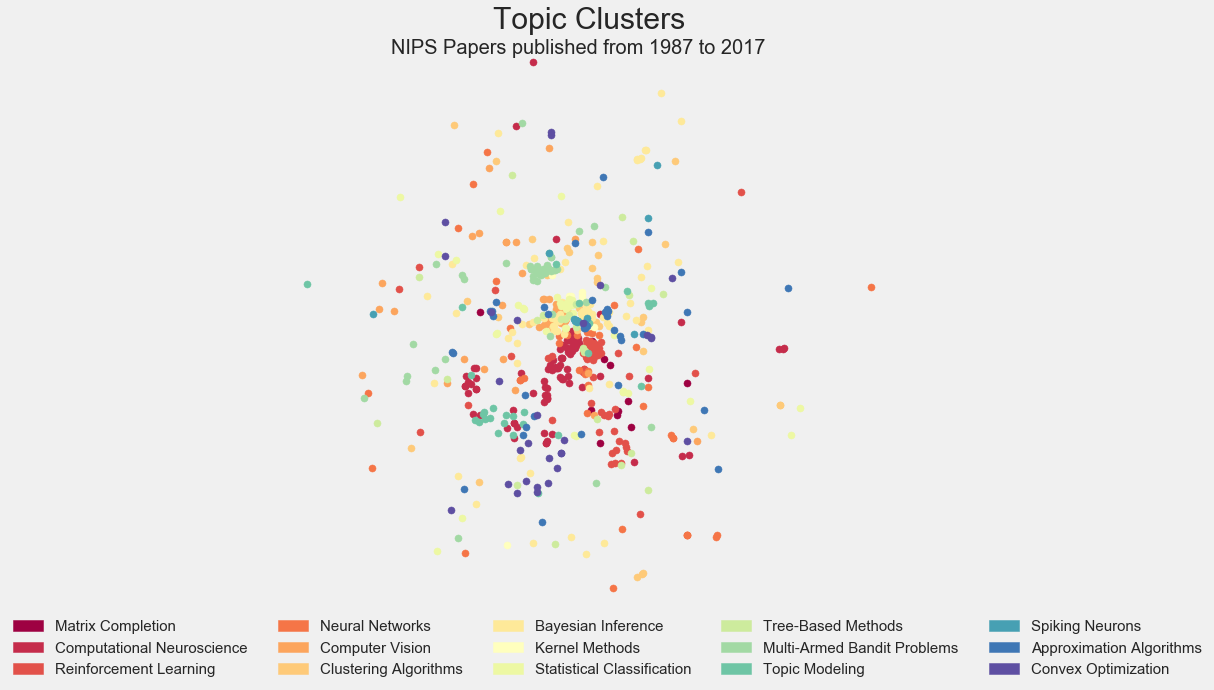

In [375]:
#these topics are not accurate yet

tsne_2d_plot(df_2d_pca, 2017, fifteen_topics)

# LDA

In [293]:
def model_lda(sparse_matrix, n_components, max_iter):
    lda = LatentDirichletAllocation(n_components=n_components, max_iter=max_iter, 
                                    learning_method='online', n_jobs=-1, verbose=0, random_state=42)
    lda_topicspace = lda.fit_transform(sparse_matrix)
    return lda, lda_topicspace

In [314]:
lda_model, lda_matrix = model_lda(tfidf_sparse, n_components=10, max_iter=10)

In [315]:
lda_matrix

array([[0.00690609, 0.00690027, 0.00690027, ..., 0.00690027, 0.00690152,
        0.00690027],
       [0.01053145, 0.01053031, 0.01053031, ..., 0.01053031, 0.01053039,
        0.01053031],
       [0.00728824, 0.00728146, 0.00728146, ..., 0.00728146, 0.00728452,
        0.00728146],
       ...,
       [0.00747686, 0.00747618, 0.00747618, ..., 0.00747618, 0.00747621,
        0.00747618],
       [0.00879192, 0.00879074, 0.00879074, ..., 0.00879074, 0.00879074,
        0.00879074],
       [0.00740025, 0.00739884, 0.00739884, ..., 0.00739884, 0.0074002 ,
        0.00739884]])

In [316]:
lda_model.components_

array([[0.10000077, 0.10001839, 0.10002491, ..., 0.10001884, 0.10000577,
        0.10000976],
       [0.10000011, 0.10000012, 0.10000021, ..., 0.10000013, 0.10000011,
        0.10000013],
       [0.10000015, 0.10000016, 0.10000015, ..., 0.10000018, 0.10000013,
        0.10000011],
       ...,
       [0.10000013, 0.10000015, 0.10000018, ..., 0.1000001 , 0.10000012,
        0.10000013],
       [0.10000248, 0.10000202, 0.10000979, ..., 0.10000702, 0.10000452,
        0.10000254],
       [0.10000012, 0.1000002 , 0.10000016, ..., 0.10000013, 0.10000011,
        0.10000017]])

In [317]:
pickle_(lda_model, 'lda_model')
pickle_(lda_matrix, 'lda_matrix')

'''
lda_model=unpickle_('lda_model.pickle')
lda_matrix=unpickle_('lda_matrix.pickle')
'''

"\nlda_model=unpickle_('lda_model.pickle')\nlda_matrix=unpickle_('lda_matrix.pickle')\n"

In [318]:
topic_model(tfidf_vectorizer, lda_model, num_words=10)

Topic 1
['neuron', 'spike', 'cell', 'synapt', 'circuit', 'synaps', 'stimulu', 'respons', 'voltag', 'activ']
Topic 2
['network', 'equilibrium', 'v', 'w', 'neural', 'state', 'cell', 'time', 'hopfield', 'output']
Topic 3
['network', 'layer', 'orient', 'unit', 'cell', 'brain', 'pattern', 'memori', 'map', 'train']
Topic 4
['sentenc', 'grammar', 'pars', 'phrase', 'languag', 'linguist', 'np', 'corpu', 'connectionist', 'lstm']
Topic 5
['learn', 'algorithm', 'y', 'f', 'data', 'network', 'w', 'train', 'v', 'h']
Topic 6
['memori', 'neuron', 'puls', 'devic', 'chip', 'capac', 'optic', 'cycl', 'connect', 'voltag']
Topic 7
['templat', 'waveform', 'eeg', 'network', 'pattern', 'memori', 'cell', 'classifi', 'branch', 'node']
Topic 8
['unit', 'network', 'pattern', 'weight', 'layer', 'learn', 'input', 'activ', 'fig', 'cell']
Topic 9
['speech', 'speaker', 'hmm', 'copula', 'phonem', 'acoust', 'recognit', 'audio', 'frame', 'mlp']
Topic 10
['pattern', 'cell', 'network', 'circuit', 'neuron', 'domin', 'input', 

In [319]:
lda_matrix=scaled_matrix(lda_matrix)

In [320]:
top_doc_per_topic(lda_matrix, 3, df)


Topic 1
network activity determines spatio temporal integration in single cells
neural architecture
amplifying and linearizing apical synaptic inputs to cortical pyramidal cells

Topic 2
alternating minimization for regression problems with vector valued outputs
mean field residual networks on the edge of chaos
regret bounds for non decomposable metrics with missing labels

Topic 3
alternating minimization for regression problems with vector valued outputs
mean field residual networks on the edge of chaos
regret bounds for non decomposable metrics with missing labels

Topic 4
incremental parsing by modular recurrent connectionist networks
generalization performance in parsec a structured connectionist parsing architecture
discriminative log linear grammars with latent variables

Topic 5
invariant feature extraction and classification in kernel spaces
maximal sparsity with deep networks 
toward goal driven neural network models for the rodent whisker trigeminal system

Topic 6
alternat

In [321]:
lda_2D_model, klda_2d_matrix = tsne_model(lda_matrix, num_dimensions=2, perplexity=30, n_iter=2000)

In [322]:
pickle_(lda_2D_model, 'lda_2D_model')
pickle_(klda_2d_matrix, 'klda_2d_matrix')
'''
lda_model=unpickle_('lda_model.pickle')
lda_matrix=unpickle_('lda_matrix.pickle')'''

"\nlda_model=unpickle_('lda_model.pickle')\nlda_matrix=unpickle_('lda_matrix.pickle')"

In [323]:
df_2d_lda=tsne_df_2D(klda_2d_matrix, lda_matrix, df)

In [324]:
pickle_(df_2d_lda, 'df_2d_lda')
#df_2d_lda=unpickle_('df_2d_lda.pickle')

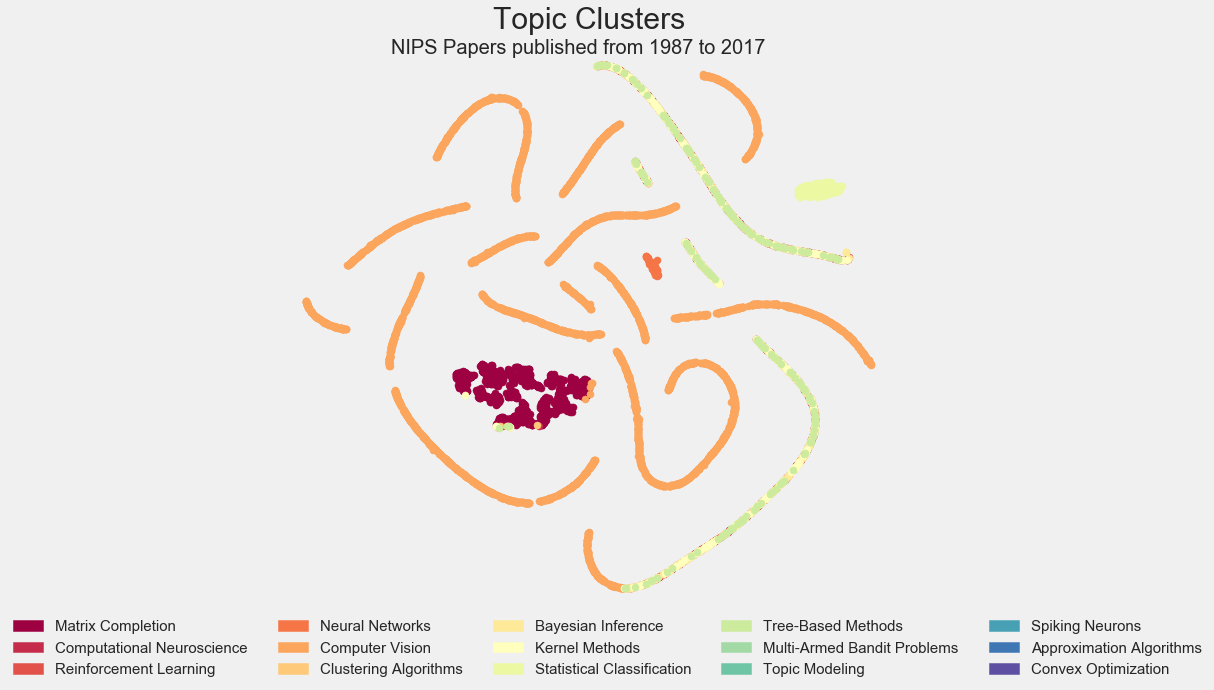

In [325]:
#these topics are not accurate yet
#LDA is not doing what we want
tsne_2d_plot(df_2d_lda, 2017, fifteen_topics)

## LSA

In [292]:
from sklearn.decomposition import TruncatedSVD


In [ ]:
"""
lsa = TruncatedSVD(15, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform()
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
"""


In [326]:
def model_lsa(sparse_matrix, n_components, algorithm):
    lsa = TruncatedSVD(n_components=n_components, algorithm=algorithm, random_state=42)
    lsa_topicspace = lsa.fit_transform(sparse_matrix)
    return lsa, lsa_topicspace

In [327]:
lsa_model, lsa_matrix = model_lsa(tfidf_sparse, n_components=15, algorithm='arpack')

In [328]:
lsa_matrix

array([[ 0.40957976,  0.0637208 , -0.05944091, ..., -0.09927481,
         0.03203997,  0.06917115],
       [ 0.22391482,  0.02096875,  0.02945187, ..., -0.0283452 ,
         0.08489143, -0.04756503],
       [ 0.43447251,  0.22847266,  0.01655632, ...,  0.00611755,
        -0.05826499, -0.01841466],
       ...,
       [ 0.45550204,  0.0474311 , -0.08366779, ...,  0.08862802,
        -0.02012   , -0.06133167],
       [ 0.35718061, -0.0998273 ,  0.00590611, ..., -0.00791862,
         0.02391323, -0.07193096],
       [ 0.43513464, -0.10319324,  0.05704125, ...,  0.03418155,
        -0.04477794,  0.16251305]])

In [329]:
lsa_model.components_

array([[ 3.58303031e-03,  8.58870796e-03,  1.00325212e-02, ...,
         7.29043642e-03,  8.92876813e-03,  1.38956343e-02],
       [-1.99235220e-03, -1.73460511e-03,  9.88054887e-03, ...,
        -2.70679807e-03, -6.77415384e-03, -9.48000460e-03],
       [ 4.81521821e-03,  3.51073118e-05, -1.09530278e-03, ...,
        -6.97224928e-04, -7.09448564e-03,  1.83398294e-02],
       ...,
       [ 1.02042340e-04,  3.61871809e-03, -1.32637800e-03, ...,
         7.21142365e-03,  8.70604853e-03,  3.19908882e-02],
       [ 1.14820981e-03, -1.71594214e-04,  3.35329374e-03, ...,
        -9.39659972e-04,  4.22218625e-03,  2.00393936e-02],
       [ 1.44703920e-04, -3.03917733e-03, -1.53392640e-04, ...,
         5.49636320e-03, -9.17976886e-03,  6.51547208e-02]])

In [330]:
pickle_(lsa_model, 'lsa_model')
pickle_(lsa_matrix, 'lsa_matrix')

'''
lsa_model=unpickle_('lsa_model.pickle')
lsa_matrix=unpickle_('lsa_matrix.pickle')
'''

"\nlsa_model=unpickle_('lsa_model.pickle')\nlsa_matrix=unpickle_('lsa_matrix.pickle')\n"

In [331]:
topic_model(tfidf_vectorizer, lsa_model, num_words=10)

Topic 1
['learn', 'algorithm', 'y', 'f', 'network', 'data', 'w', 'train', 'h', 'v']
Topic 2
['neuron', 'network', 'spike', 'layer', 'input', 'imag', 'cell', 'unit', 'neural', 'activ']
Topic 3
['polici', 'action', 'reward', 'state', 'neuron', 'agent', 'regret', 'spike', 'mdp', 'reinforc']
Topic 4
['neuron', 'spike', 'f', 'cell', 'synapt', 'synaps', 'matrix', 'stimulu', 'u', 'estim']
Topic 5
['network', 'train', 'layer', 'unit', 'w', 'f', 'weight', 'output', 'input', 'loss']
Topic 6
['cluster', 'node', 'graph', 'network', 'tree', 'edg', 'partit', 'v', 'algorithm', 'hidden']
Topic 7
['posterior', 'distribut', 'gaussian', 'z', 'estim', 'q', 'sampl', 'bayesian', 'prior', 'infer']
Topic 8
['kernel', 'cluster', 'polici', 'svm', 'learn', 'data', 'classifi', 'classif', 'label', 'spike']
Topic 9
['label', 'spike', 'y', 'tree', 'classifi', 'regret', 'neuron', 'loss', 'node', 'bound']
Topic 10
['graph', 'node', 'v', 'kernel', 'tree', 'y', 'edg', 'imag', 'u', 'z']
Topic 11
['regret', 'kernel', 'arm

In [332]:
lsa_matrix=scaled_matrix(lsa_matrix)

In [333]:
top_doc_per_topic(lsa_matrix, 3, df)


Topic 1
communication efficient algorithms for statistical optimization
robust conditional probabilities
falkon an optimal large scale kernel method

Topic 2
rapid visual processing using spike asynchrony
model of a biological neuron as a temporal neural network
attentional processing on a spike based vlsi neural network

Topic 3
a convergent form of approximate policy iteration
experimental results on learning stochastic memoryless policies for partially observable markov decision processes
logarithmic online regret bounds for undiscounted reinforcement learning

Topic 4
exact differential equation population dynamics for integrate and fire neurons
learning in silicon timing is everything
spiking inputs to a winner take all network

Topic 5
an experimental comparison of recurrent neural networks
size of multilayer networks for exact learning analytic approach
training very deep networks

Topic 6
graphons mergeons and so on 
efficient bayesian inference for dynamically changing graphs

In [334]:
lsa_2D_model, lsa_2d_matrix = tsne_model(lsa_matrix, num_dimensions=2, perplexity=30, n_iter=2000)

In [335]:
pickle_(lsa_2D_model, 'lsa_2D_model')
pickle_(lsa_2d_matrix, 'lsa_2d_matrix')
'''
lsa_model=unpickle_('lsa_model.pickle')
lsa_matrix=unpickle_('lsa_matrix.pickle')''';

In [336]:
df_2d_lsa=tsne_df_2D(lsa_2d_matrix, lsa_matrix, df)

In [337]:
pickle_(df_2d_lsa, 'df_2d_lsa')
#df_2d_lda=unpickle_('df_2d_lda.pickle')

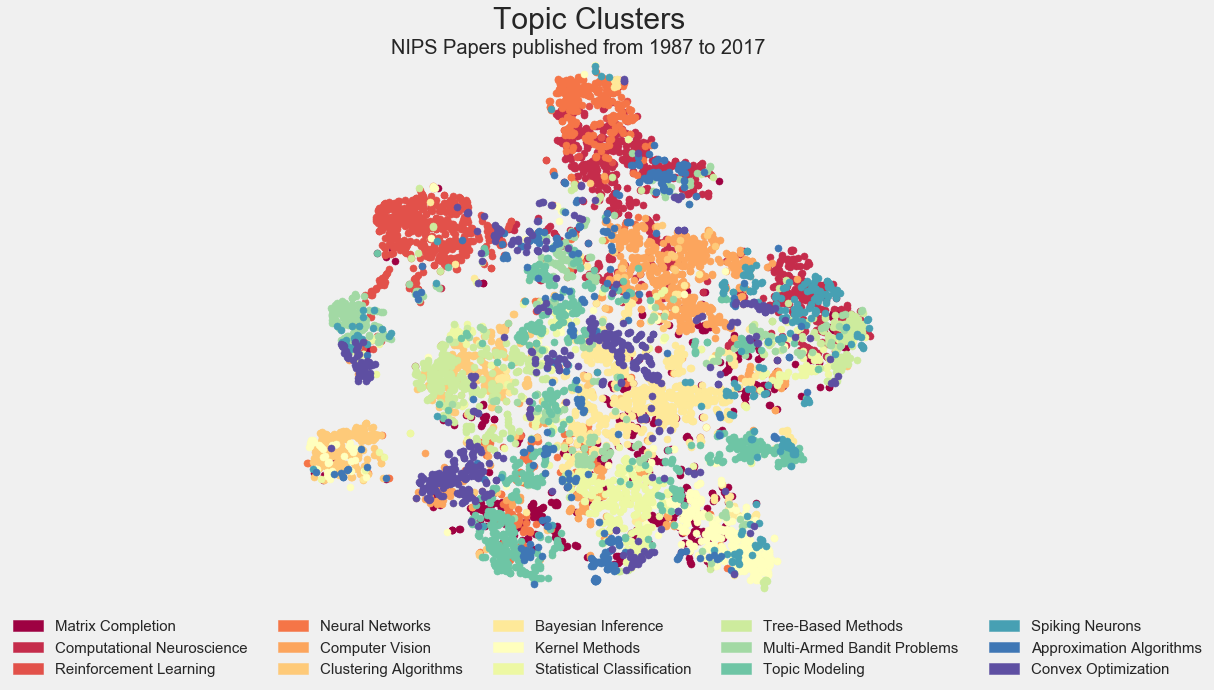

In [338]:
#these topics are not accurate yet
#LDA is not doing what we want
tsne_2d_plot(df_2d_lsa, 2017, fifteen_topics)